<a href="https://colab.research.google.com/github/itonsoup/Google-Colab/blob/main/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_6_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%B0_%D1%81%D0%B8%D0%BD%D1%82%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Импорт данных


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles, make_classification


# Данные

Наши старые друзья / знакомые


In [ ]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    X, y = ds

    cm_bright = ListedColormap(colors)
    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

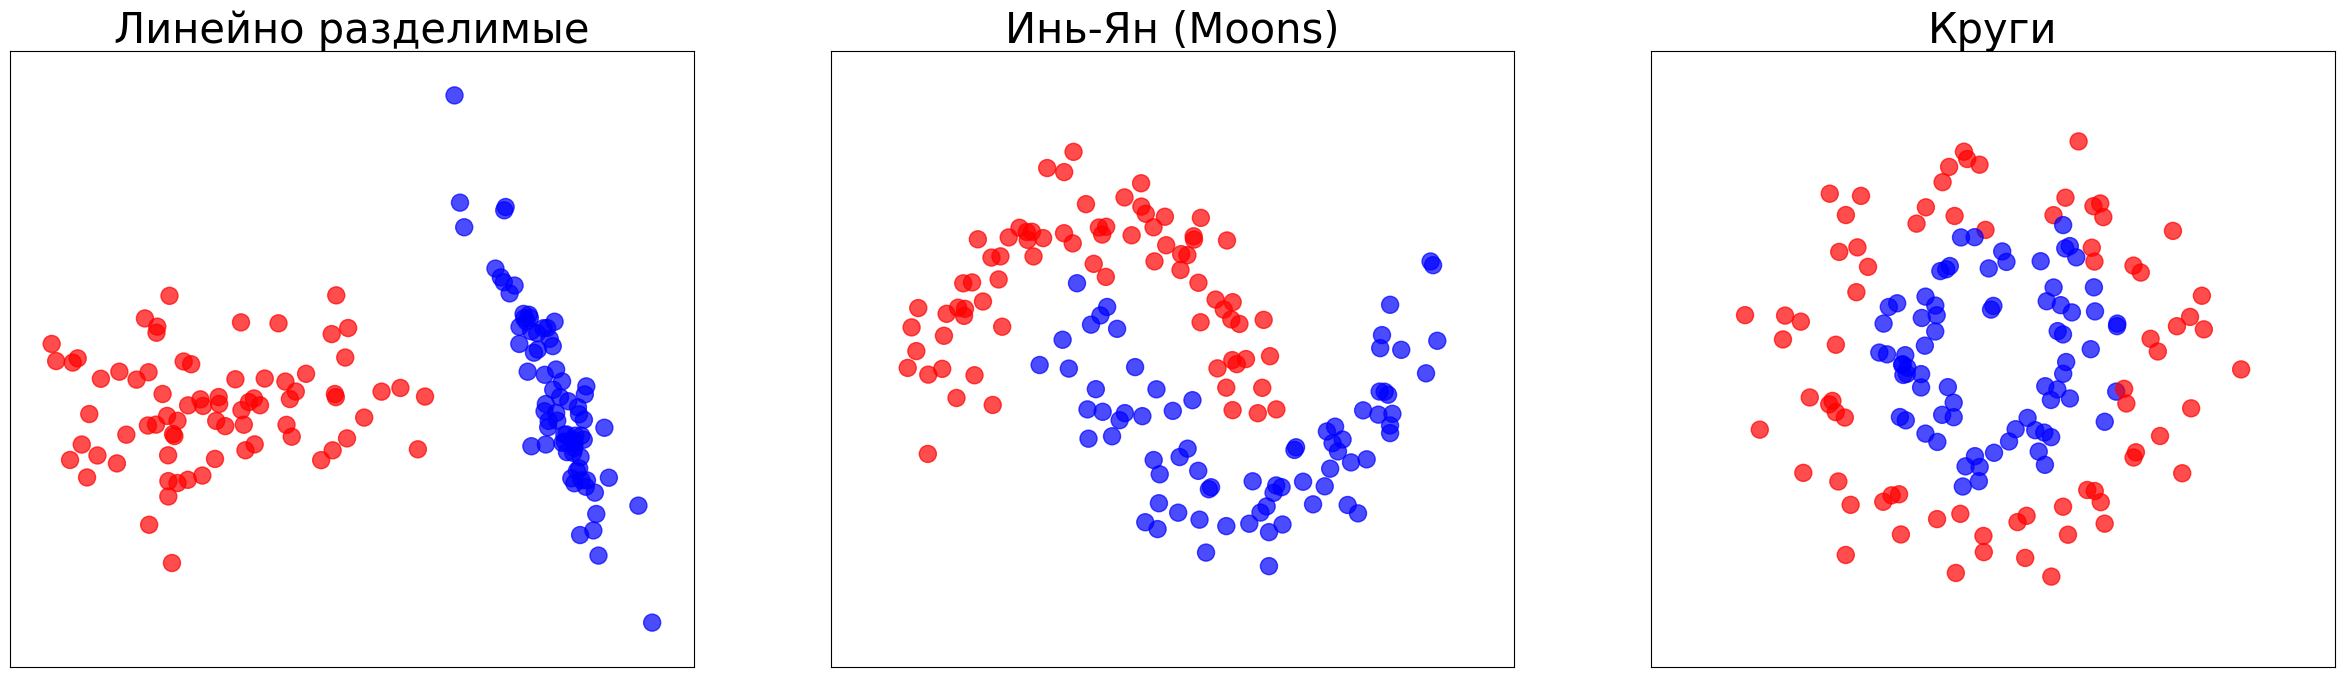

In [ ]:
#@title данные { run: "auto" }
N = 150 #@param {type:"slider", min:50, max:250, step:25}
noises = 0.15 #@param {type:"slider", min:0, max:1, step:0.05}

def make_binary_clf(N, method = 'line',
                    noises = 0.15,
                    random_state = 42):

    if random_state: rng = np.random.RandomState(seed = random_state)

    if method == 'line' or method is None:
        X, y = make_classification(n_samples=N, n_features=2,
                                   n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, class_sep=2,
                                   random_state=random_state)
        X += np.random.randn(*X.shape) *noises
        out = (X, y)

    elif method == 'moons':
        X, y = make_moons(n_samples=N, noise=noises,
                          random_state=random_state)

    elif method == 'circles':
        X, y = make_circles(n_samples=N, noise=noises, factor=0.5,
                            random_state=random_state )


    return X,y


fig=plt.figure(figsize=(30,8))

ax = plt.subplot(1, 3, 1)
plot_data(ax,make_binary_clf(N,method = 'line', noises = noises),
          'Линейно разделимые')
ax = plt.subplot(1, 3, 2)
plot_data(ax,make_binary_clf(N,method = 'moons', noises = noises),
          'Инь-Ян (Moons)')
ax = plt.subplot(1, 3, 3)
plot_data(ax, make_binary_clf(N,method = 'circles', noises = noises),
          'Круги')




## Кластеризация k-средних

В ряде случаев при анализе данных оказывается так, что про данные ничего не известно, однако хочется понять на сколько они однородны или, например, могут быть разделены на группы. Такие группы можно назвать кластерами. Задача разделения на кластеры не требует наличия учителя. Другими словами, мы пытаемся найти закономерности в данных как таковых без привязки к тому, какие результаты для них мы хотим получить.<br>

 Одним из самых простых методов кластеризации является метод k-средних.
Суть данного метода сводится к тому, чтобы найти заданное число кластеров (k) и их центры (т.н. центроиды) таких, чтобы расстояние от центроидов до всех точек кластера было минимальным.

Алгоритм k-средних может быть описан следующим образом <ul>
<li>выбирается к случайным точкам - центроиды.
<li>рассчитывается вектор расстояние между каждой точкой набора данных и каждым центроидом.
<li>в каждый кластер записываются те точки для которых оказалось, что для соответствующего центроида расстояние меньше, чем для других.
<li>новые значение центроидов рассчитываются как среднее значение по всем точкам кластера.


In [ ]:
X,y = make_binary_clf(N,method = 'line', noises=0.05, )


X.shape

(150, 2)

In [ ]:
X

array([[ 1.82844462,  2.40576464],
       [ 1.33510688,  3.57292829],
       [-2.42153416,  2.14520616],
       [-4.02621576,  1.54116855],
       [-3.63449753,  1.61453147],
       [ 1.56070507,  3.0109457 ],
       [ 2.43834234,  0.97189469],
       [-2.70095265,  1.08997487],
       [ 2.36491686,  1.05148455],
       [ 1.15852922,  4.23668613],
       [ 1.76151218,  2.56821028],
       [ 1.00524549,  4.0588403 ],
       [ 0.61200135,  5.58900128],
       [ 1.16509235,  4.13777229],
       [-1.45656631,  2.43660708],
       [ 1.59869223,  2.69738756],
       [-0.99544042,  1.88758777],
       [ 1.40203482,  3.33735227],
       [-0.67330353,  2.65366883],
       [ 2.38226874,  1.01480728],
       [ 2.39332902,  1.06211754],
       [ 1.76964728,  2.47178069],
       [ 1.94229476,  2.35684594],
       [ 2.14237025,  1.53414335],
       [ 2.67350572,  0.35735082],
       [-2.49230459,  0.23934164],
       [-3.90493221,  2.52412817],
       [-2.21654158,  1.32105054],
       [ 2.1740264 ,

Рассчитаем расстояние как сумму разностей квадратов.

In [ ]:
def distance(X1, X2, metric = 'euclidean', p = 2):
    if metric == 'euclidean':
        dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
    if metric == 'cityblock':
        dist = np.sum(np.abs(X1 - X2).T,axis=0)
    if metric == 'Chebyshev':
        dist = np.max(np.abs(X1 - X2).T,axis=0)
    if metric == 'Minkowski':
        dist = np.power(np.sum(np.power(np.abs(X1 - X2),p).T,axis=0),1/p)
    return dist

Проведем несколько тестов, функция работает как с векторами, так и матрицами равной размерности.

In [ ]:
X[:5]

array([[ 1.82844462,  2.40576464],
       [ 1.33510688,  3.57292829],
       [-2.42153416,  2.14520616],
       [-4.02621576,  1.54116855],
       [-3.63449753,  1.61453147]])

In [ ]:
X[10:15]

array([[ 1.76151218,  2.56821028],
       [ 1.00524549,  4.0588403 ],
       [ 0.61200135,  5.58900128],
       [ 1.16509235,  4.13777229],
       [-1.45656631,  2.43660708]])

In [ ]:
print(distance(X[0], X[1],metric = 'cityblock'))
print(distance(X[:5], X[10:15]))
print(distance(X[0], X[10:15]))

1.6605013876163037
[0.17569444 0.58729806 4.58934227 5.80448368 2.32791596]
[0.17569444 1.84670407 3.40774554 1.85469316 3.28515571]


In [ ]:
metrics = ['euclidean','cityblock','Chebyshev','Minkowski']

In [ ]:
for metric in metrics:
    print(distance(X[0], X[1],metric = metric, p = 10))

1.267143680371932
1.6605013876163037
1.1671636481217922
1.1671848914250842


Прежде чем проводить кластеризацию необходимо проинициализировать калстеры.<br>
Для этого выберем случайные индексы среди доступных в наборе данных.

In [ ]:
def init_centroids(X, n_clusters, random_state = 42):
    if random_state: rng = np.random.seed(random_state)
    centroid_idxs = np.random.randint(0, X.shape[0], size = n_clusters)
    return X[centroid_idxs,:]


посмотрим как это работает для двух кластеров

In [ ]:
n_clusters = 2
centroids = init_centroids(X, n_clusters)
print(centroids)

[[-2.46951693  2.37976229]
 [ 1.81942429  2.34811229]]


Проведем первую кластеризацию. Для этого возьмем каждый центроид и посчитаем расстояние от него до все записей набора данных. <br>
Индексы значений для каждого кластера выберем как индексы минимальных расстояний до соответствующего центроида. <br>
Таким образом, нулевой кластер будет включать те точки набора данных, в которых расстояние до нулевого центроида меньше, чем до первого центроида.

In [ ]:
def predict(X, n_clusters, centroids, metric = 'euclidean', p = 2):
    distances = np.zeros((X.shape[0], n_clusters))

    for i,centr in enumerate(centroids):
        distances[:,i] = distance(centr,X, metric, p)

    cluster_label = np.argmin(distances,axis = 1)
    return cluster_label, distances

посмотрим как распределились результаты кластеризации

Для этого бахнем функцию (чтобы не повторятся)

In [ ]:
def plot_cluster(X,centroids, cluster_label, centroids_label, old_centroids = None, old_centroids_label = None):

    fig = plt.figure(figsize=(11,10))

    plt.scatter(X[:, 0], X[:, 1],
                c = cluster_label, cmap = 'bwr',
                s=100,alpha = 0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c = centroids_label, cmap = 'bwr',
                s=400, edgecolors = 'k')

    if old_centroids is not None:
        plt.scatter(old_centroids[:, 0], old_centroids[:, 1],
            c = old_centroids_label, cmap = 'bwr',
            s=200, edgecolors = 'k')

    plt.xticks([])
    plt.yticks([])

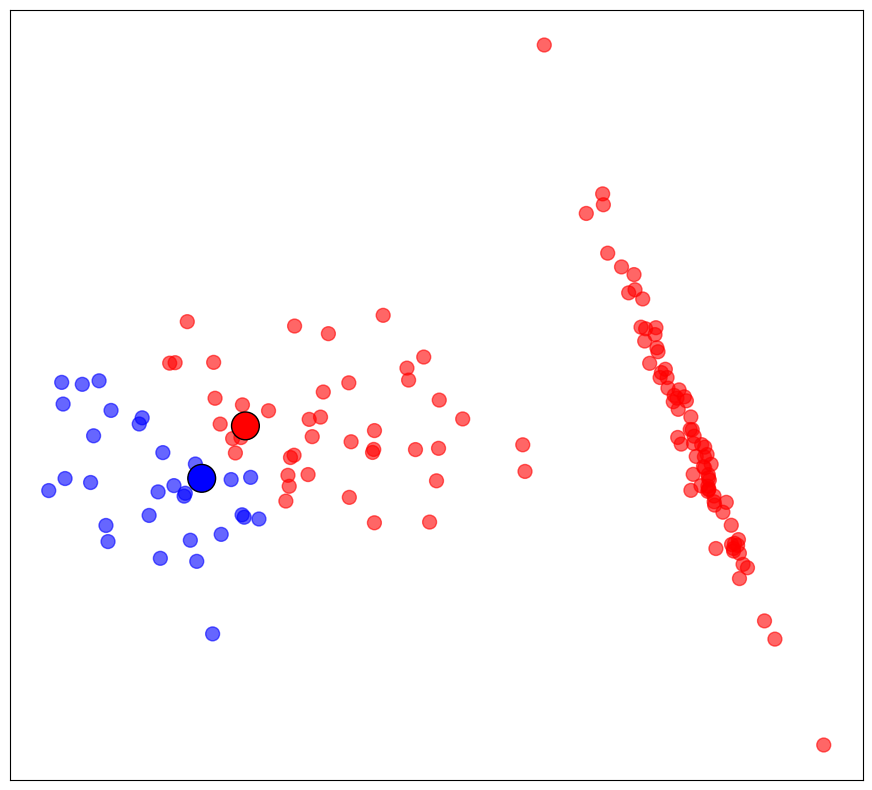

In [ ]:
centroids = init_centroids(X, n_clusters, random_state=32)

cluster_label, distances=predict(X, n_clusters, centroids)
centroids_label = [0,1]

plot_cluster(X,centroids,
             cluster_label, centroids_label,)

Теперь выберем новые центроиды, для этого нам понадобиться выбрать каждый кластер по отдельности

In [ ]:
old_centroids = np.copy(centroids)

for k in range(n_clusters):
    c_idxs = np.flatnonzero(cluster_label==k)
    centroids[k] = X[c_idxs].mean(axis = 0)

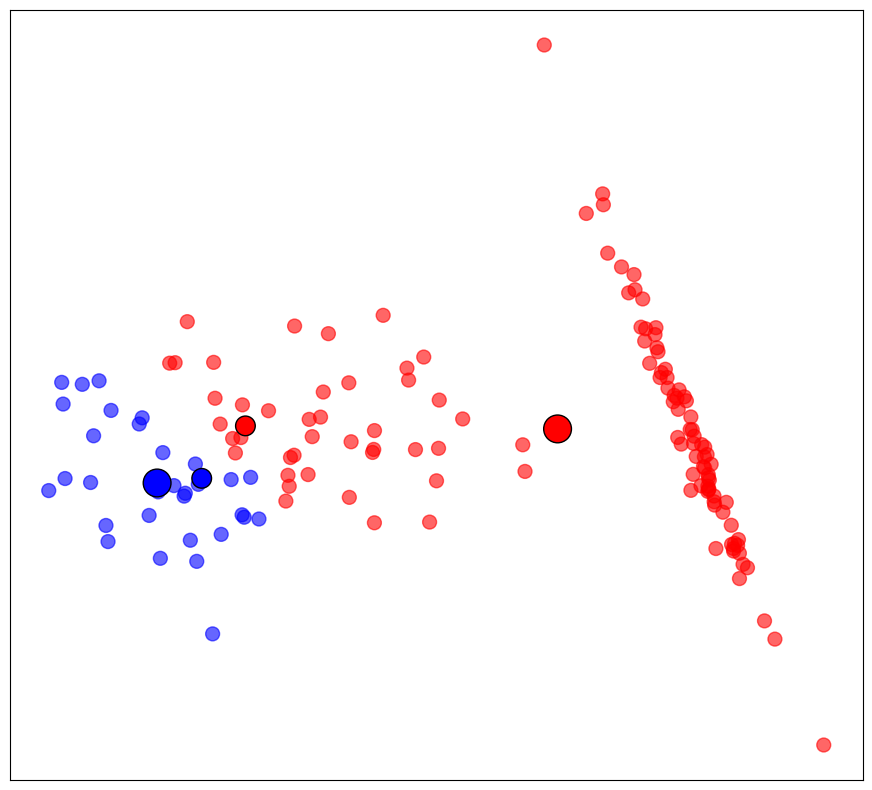

In [ ]:
plot_cluster(X,centroids,
             cluster_label, centroids_label,
             old_centroids, centroids_label)

Рассчитаем относительное расстояние между старыми и новыми центроидами. Если расстояние между обновленными центроидами будет сравнительно небольшим - то есть центроиды перестанут менять позицию, то мы будем считать что кластеризация закончена.

In [ ]:
def delta_centroids(centroids,old_centroids, metric = 'euclidean', p = 2):
    return (distance(centroids,old_centroids, metric, p)/distance(old_centroids, np.mean(old_centroids), metric, p)).mean()

delta_centroids(centroids,old_centroids)

0.5458882248327188

Попробуем создать процедуры итерационной кластеризации. В кноце процедуры выведем результирующий номер итерации и расстояние между кластерами

In [ ]:
def fit(X, n_clusters, centroids, max_iter=10, tol=0.01, metric = 'euclidean', p = 2):

    dcentr = np.inf

    for i in range(max_iter):

        old_centroids = np.copy(centroids)
        cluster_label,_=predict(X, n_clusters, centroids, metric, p)

        for k in range(n_clusters):
            c_idxs = np.flatnonzero(cluster_label==k)
            centroids[k] = X[c_idxs].mean(axis = 0)

        dcentr = delta_centroids(centroids,old_centroids, metric, p)

        if dcentr<=tol:
            break

    print('Мы остановились на итерации:', i,', относительное изменение центроидов: ',dcentr)

    return cluster_label

проверим и визуализируем результаты:

In [ ]:
cluster_label = fit(X, n_clusters, centroids, max_iter=100, tol=0.001)

Мы остановились на итерации: 3 , относительное изменение центроидов:  0.0


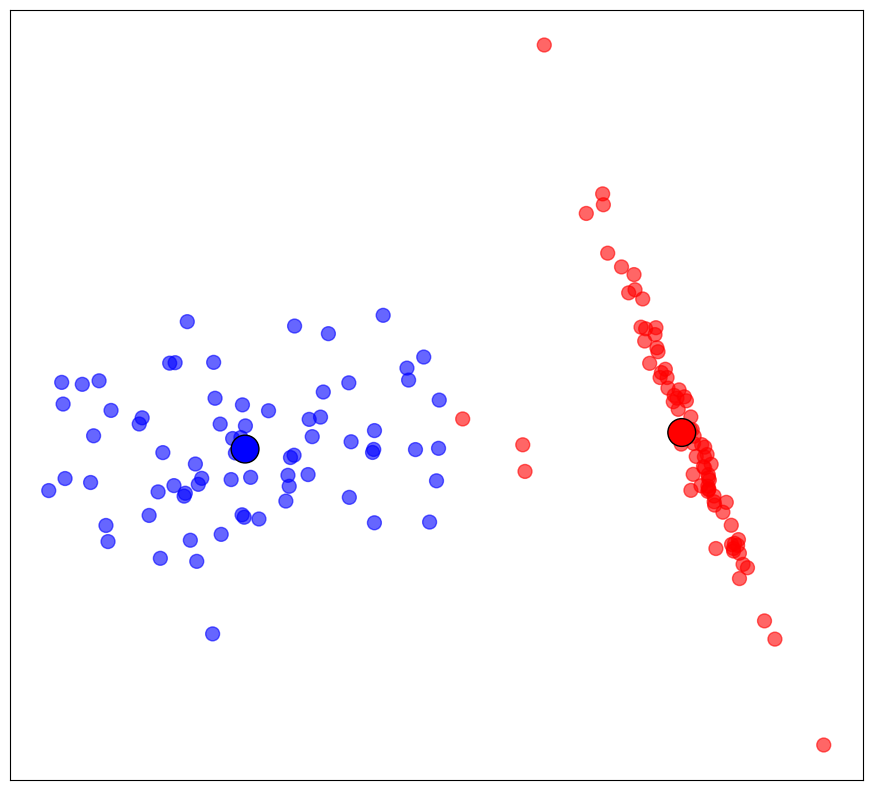

In [ ]:

plot_cluster(X,centroids,
             cluster_label, centroids_label,)

# ООП

Теперь объеденим все наши наработки в один класс.

In [ ]:
class KMeans():
    def __init__(self,n_clusters = 2, centroids = None,
                 max_iter=10, tol=0.01,
                 metric = 'euclidean', p = 2,
                 random_state = None):
        self.n_clusters = n_clusters
        self.centroids  = centroids
        self.max_iter   = max_iter
        self.tol        = tol
        self.iters      = None
        self.inertia = None
        self.metric = metric
        self.p  = p
        self.random_state  = random_state
    #-------------------------------------
    def distance(self,X1, X2):
        if self.metric == 'euclidean':
            dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
        if self.metric == 'cityblock':
            dist = np.sum(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Chebyshev':
            dist = np.max(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Minkowski':
            dist = np.power(np.sum(np.power(np.abs(X1 - X2),self.p).T,axis=0),1/self.p)
        return dist
    #-------------------------------------
    def init_centroids(self, X):
        if self.random_state: rng = np.random.seed(self.random_state)
        c_idxs = np.random.randint(0, X.shape[0], size = self.n_clusters)
        return X[c_idxs,:]
    #-------------------------------------
    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i,centr in enumerate(self.centroids):
            distances[:,i] = self.distance(centr,X)
        self.inertia = np.sum(np.power(np.min(distances,axis = 1),2))
        return np.argmin(distances,axis = 1)
    #-------------------------------------
    def transform(self,X):
        return self.predict(X)
    #-------------------------------------
    def delta_centroids(self,old_centroids):
        return (
                distance(self.centroids,old_centroids)/
                distance(old_centroids, np.mean(old_centroids))
               ).mean()
    #-------------------------------------
    def fit(self, X):

        if self.centroids is None:
            self.centroids = self.init_centroids(X)

        d_centrs = np.inf

        for i in range(self.max_iter):

            old_centroids = np.copy(self.centroids)

            cluster_label = self.predict(X)

            for k in range(self.n_clusters):

                c_idxs = np.flatnonzero(cluster_label==k)

                self.centroids[k] = X[c_idxs].mean(axis = 0)

            d_centrs = self.delta_centroids(old_centroids)

            self.iters = i
            if d_centrs<=self.tol:
                break
        return self
    #-------------------------------------
    def fit_transform(self, X):
        return self.fit(X).predict(X)



Посмотрим метод локтя

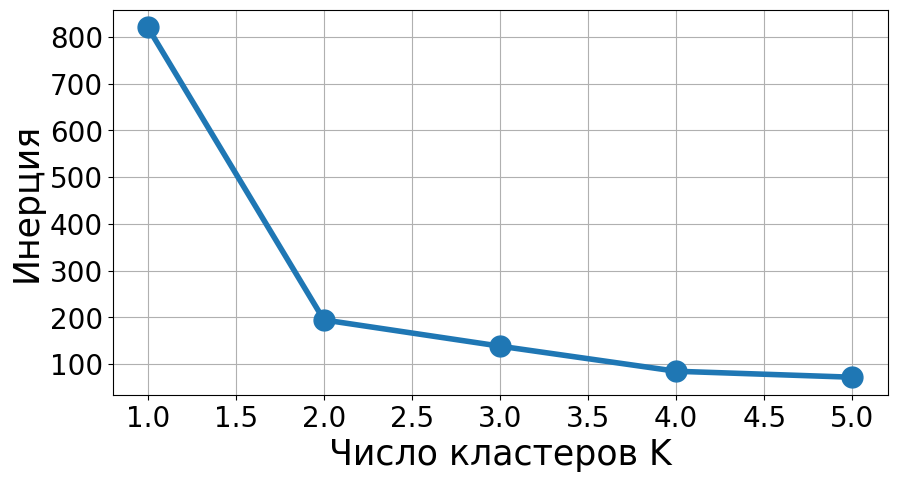

In [ ]:
sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

Посмотрим для 2 кластеров

Мы остановились на итерации:: 1


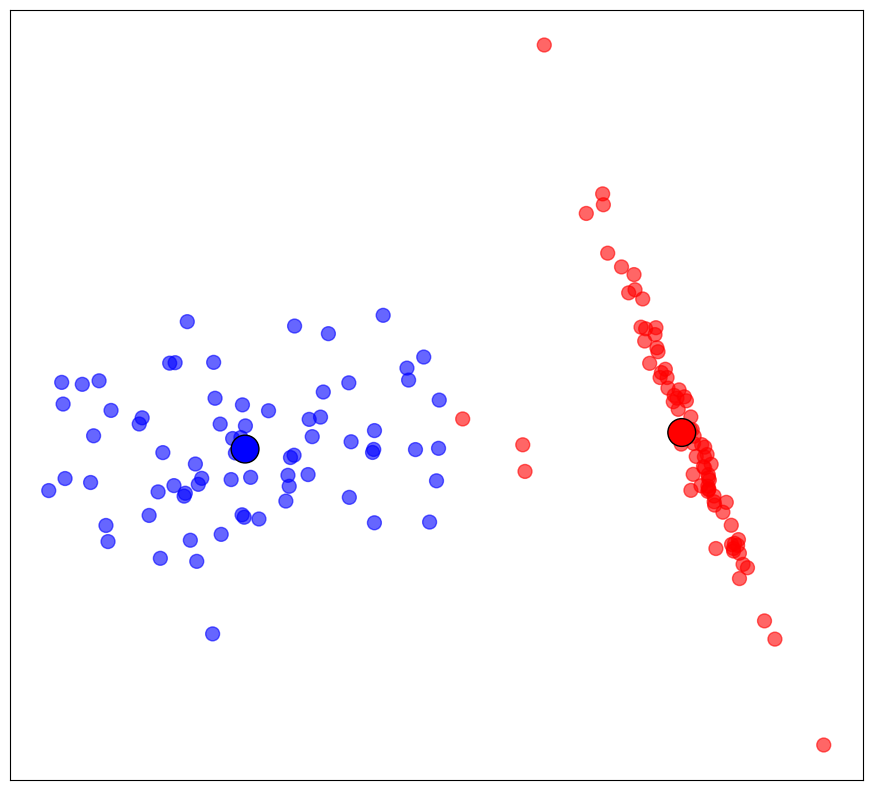

In [ ]:
kmeans   = KMeans(n_clusters=2,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X)

print('Мы остановились на итерации::',kmeans.iters)


plot_cluster(X,kmeans.centroids,
             c_labels, np.unique(c_labels),)

Посмотрим для 4 кластеров

Мы остановились на итерации:: 3


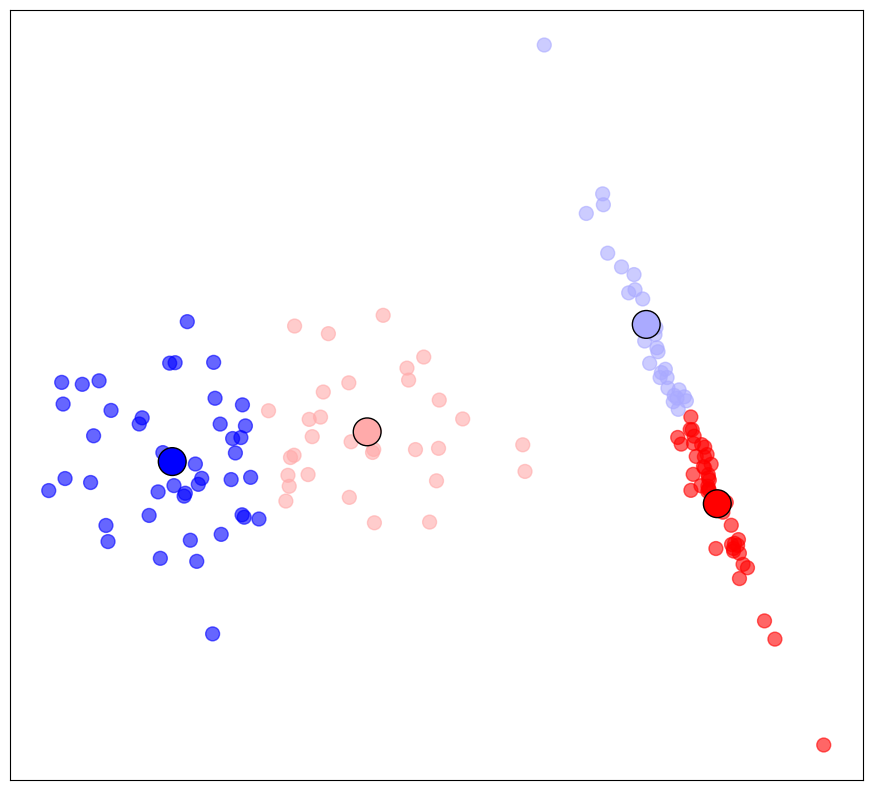

In [ ]:
kmeans   = KMeans(n_clusters=4,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X)

print('Мы остановились на итерации::',kmeans.iters)


plot_cluster(X,kmeans.centroids,
             c_labels, np.unique(c_labels),)

Немного о метриках

In [ ]:
pd.crosstab(y,c_labels, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания,0,1,2,3
Метки,,,,
0,43,0,32,0
1,0,30,0,45


# **Задания**

# 1.	Сгенерируйте линейно разделимые данные с другими пара-метрами и проверьте, как работает алгоритм кластеризации k-	cредних на этих данных. Оцените оптимальное число кла-стеров по методу локтя.


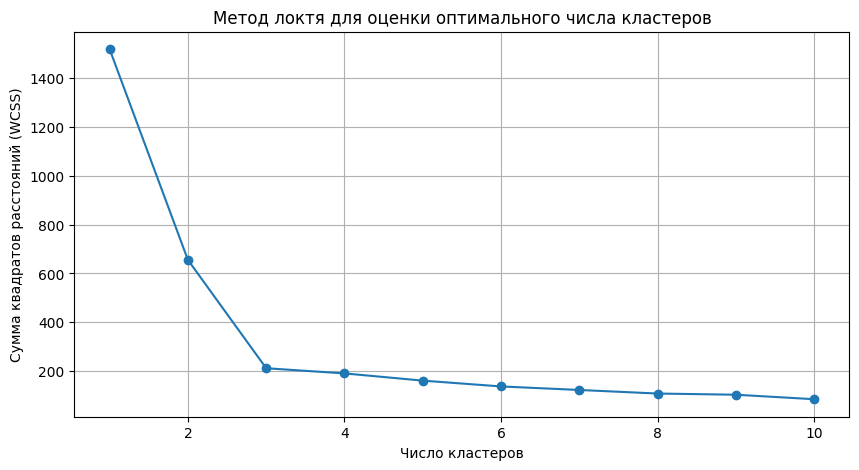

In [ ]:
# 1: Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 2: Генерируем линейно разделимые данные
n_samples = 300
n_features = 2
centers = 3
X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.60, random_state=0)

# 3: Применяем алгоритм k-средних
wcss = []


for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Шаг 4: Используем метод локтя для оценки оптимального числа кластеров
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя для оценки оптимального числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний (WCSS)')
plt.grid(True)
plt.show()

# 2.	Сгенерируйте данные, распределенные как знак инь-ян или концентрические круги, и проверьте, как работает алгоритм кластеризации  k-cредних на этих данных. Оцените оптималь-ное число кластеров по методу локтя.


Для генерации данных в форме концентрических кругов используем функцию make_circles из sklearn. Затем применим кластеризацию k-средних и определим оптимальное количество кластеров с помощью метода локтя.

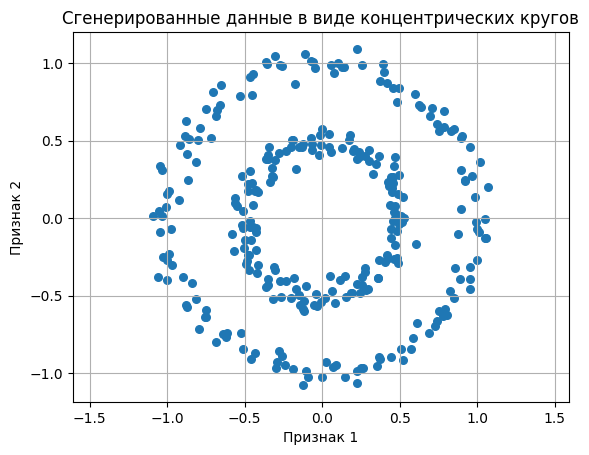

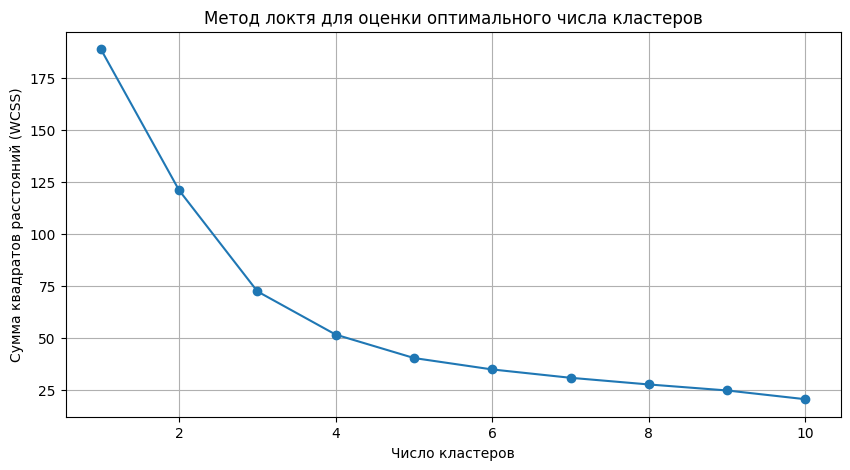

In [ ]:
# 1: Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans

# 2: Генерируем данные в виде концентрических кругов
n_samples = 300  # количество образцов
X, y = make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=0)


plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title('Сгенерированные данные в виде концентрических кругов')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True)
plt.axis('equal')
plt.show()

# 3: Применяем алгоритм k-средних
wcss = []

#
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

 # 4: Используем метод локтя для оценки оптимального числа кластеров
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя для оценки оптимального числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний (WCSS)')
plt.grid(True)
plt.show()

# 3. Загрузите данные MNIST. Уменьшите размерность данных с использованием метода главных компонент. Примените кластеризацию k-средних. Оцените оптимальное число кластеров по методу локтя и связь кластеров с цифрами на изображениях.

Здесь мы загружаем набор данных MNIST, применяем PCA для уменьшения размерности и кластеризуем данные с использованием k-средних.

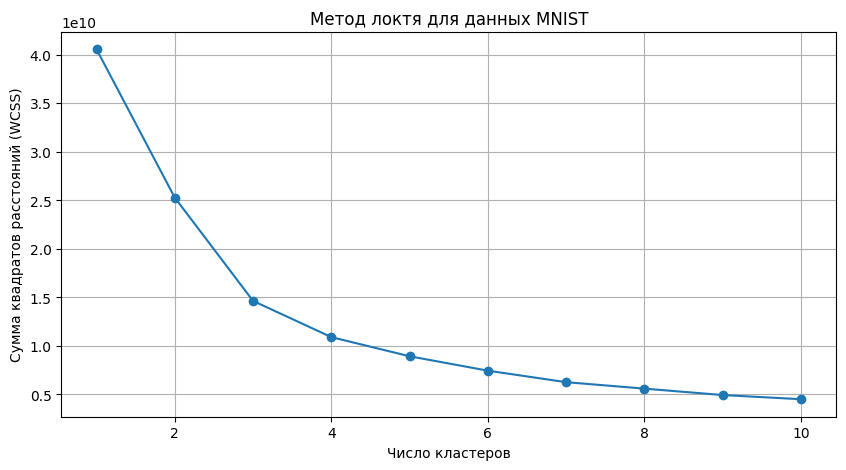

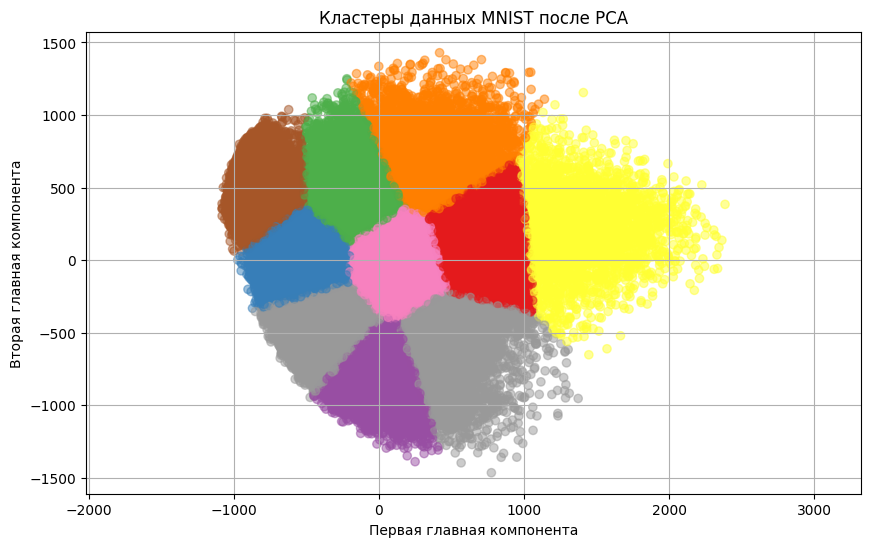

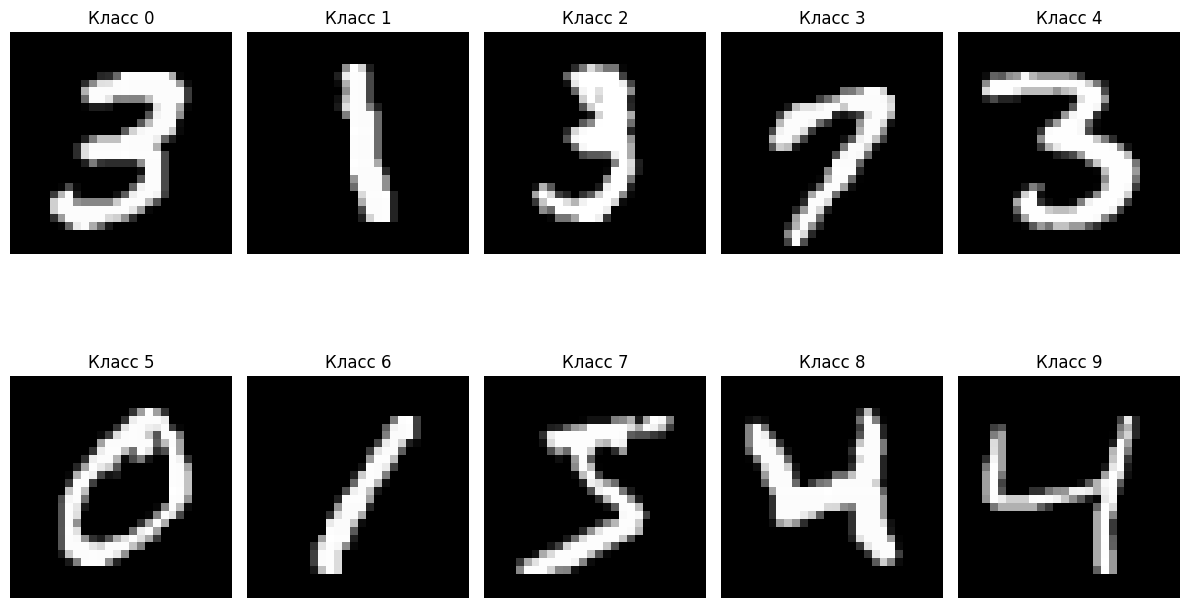

In [ ]:
# Импортируем необходимые библиотеки
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Загружаем данные MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']


y = y.astype(int)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Метод локтя
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Метод локтя
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя для данных MNIST')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний (WCSS)')
plt.grid(True)
plt.show()


optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(X_pca)


plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', alpha=0.5)
plt.title('Кластеры данных MNIST после PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid(True)
plt.axis('equal')
plt.show()


plt.figure(figsize=(12, 8))
for i in range(optimal_clusters):
    plt.subplot(2, 5, i + 1)
    cluster_samples = np.where(clusters == i)[0]
    if len(cluster_samples) > 0:
        plt.imshow(X[cluster_samples[0]].reshape(28, 28), cmap='gray')
        plt.title(f'Класс {i}')
    else:
        plt.imshow(np.zeros((28, 28)), cmap='gray')
        plt.title(f'Класс {i} (нет данных)')
    plt.axis('off')
plt.tight_layout()
plt.show()



# 4. Выполните кластеризацию для набора данных Cars: выполните кластеризацию для числовых признаков: используйте все числовые признаки, выполнив визуализацию в разных двумерных проекциях.

Здесь мы загрузим набор данных о автомобилях и выполним кластеризацию с использованием всех числовых признаков.

Saving cars.csv to cars.csv
         Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0      Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1     Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Volkswagen          Golf  1998  Hatchback       1.0                1400.0   
3     Renault        Laguna  2012  Universal  110000.0                1500.0   
4        Opel         Astra  2006  Universal  200000.0                1600.0   

      Fuel_type Transmission  Price(euro)  
0        Hybrid    Automatic       7750.0  
1        Diesel       Manual       8550.0  
2        Petrol       Manual       2200.0  
3        Diesel       Manual       6550.0  
4  Metan/Propan       Manual       4100.0  


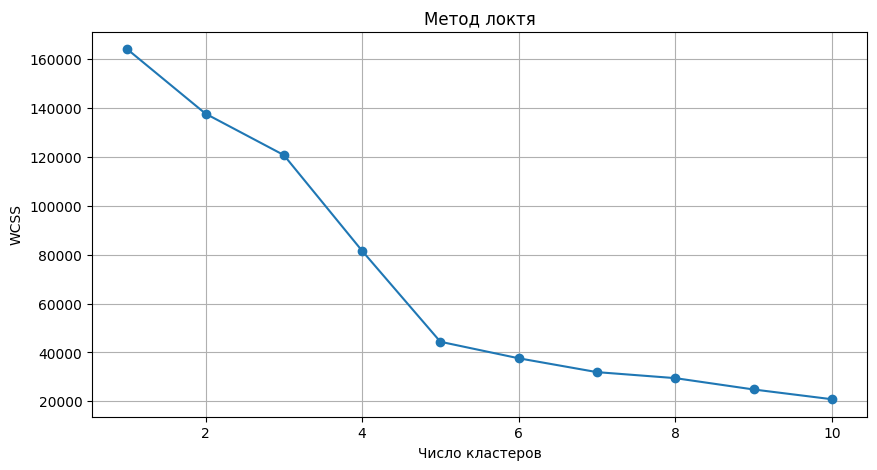

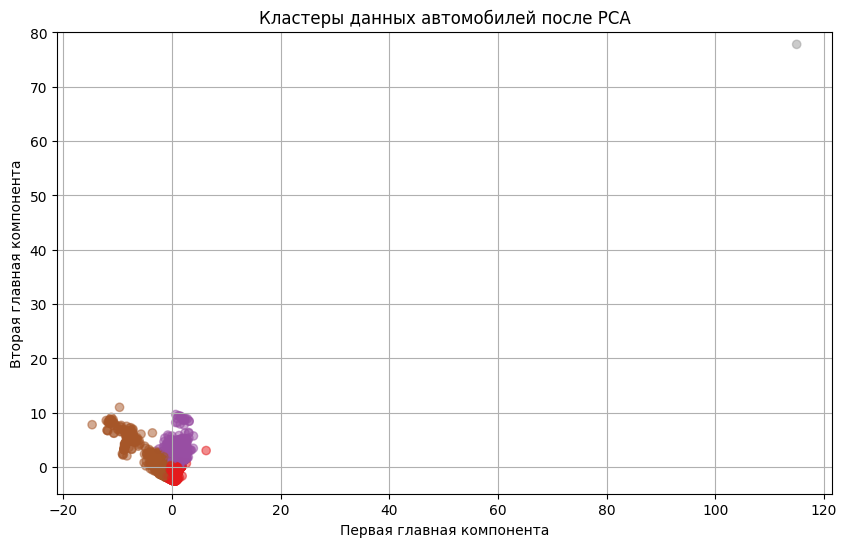

Связь с кластером для Make:
Cluster  Make        
0        Abarth             1
         Acura             11
         Alfa Romeo        23
         Alta marca        12
         Aston Martin       1
                         ... 
2        Vaz              488
         Volkswagen      1424
         Volvo             81
         Zaz               20
3        Brilliance         1
Length: 189, dtype: int64

Связь с кластером для Model:
Cluster  Model   
0        1 Series     46
         1007          1
         107          16
         108           2
         147           5
                    ... 
2        Ypsilon       1
         Zafira      103
         altele        1
         xA            1
3        BS3           1
Length: 1298, dtype: int64

Связь с кластером для Style:
Cluster  Style    
0        Cabriolet      80
         Combi         287
         Coupe         378
         Crossover    4028
         Hatchback    5117
         Microvan      411
         Minivan      2208
      

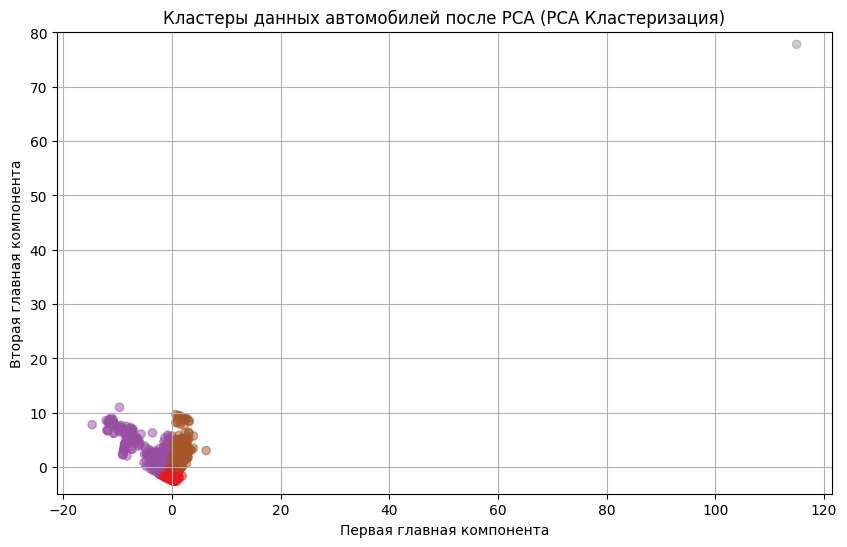

Результаты кластеризации на данных PCA:
PCA_Cluster
0              19592
2              14008
1               7406
3                  1
Name: count, dtype: int64


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Загрузка данных
from google.colab import files
uploaded = files.upload()


file_name = list(uploaded.keys())[0]


data = pd.read_csv(file_name)


print(data.head())

# 2. Предобработка данных

numerical_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(include=[object])


scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# 3. Кластеризация k-средних и метод локтя для числовых признаков
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# 4. Визуализация результатов кластеризации
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='Set1', alpha=0.5)
plt.title('Кластеры данных автомобилей после PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid(True)
plt.axis('equal')
plt.show()

# 5. Оценка связи кластеров с категориальными признаками

data['Cluster'] = clusters


for col in categorical_data.columns:
    print(f'Связь с кластером для {col}:')
    print(data.groupby(['Cluster', col]).size())
    print()

# 6. Сравнение результатов при использовании PCA

pca_kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
pca_clusters = pca_kmeans.fit_predict(reduced_data)


plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=pca_clusters, cmap='Set1', alpha=0.5)
plt.title('Кластеры данных автомобилей после PCA (PCA Кластеризация)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid(True)
plt.axis('equal')
plt.show()


print("Результаты кластеризации на данных PCA:")
print(pd.DataFrame(pca_clusters, columns=['PCA_Cluster']).value_counts())


# 5*. Сравните работу реализованных алгоритмов с функциями би-блиотеки scikit-learn — кластеризацией k-cредних sklearn.cluster.KMeans.

Кластеризация — это метод машинного обучения, используемый для группировки данных в кластеры на основе схожести их признаков. В этом задании мы сравниваем результаты кластеризации, выполненной вручную, с помощью алгоритма k-средних, реализованного в библиотеке scikit-learn, что позволяет оценить эффективность алгоритма и его соответствие реальным данным. Анализ связи кластеров с категориальными признаками помогает выявить закономерности и структуру данных, что может быть полезно для дальнейшего анализа и интерпретации результатов.

Saving cars.csv to cars (1).csv


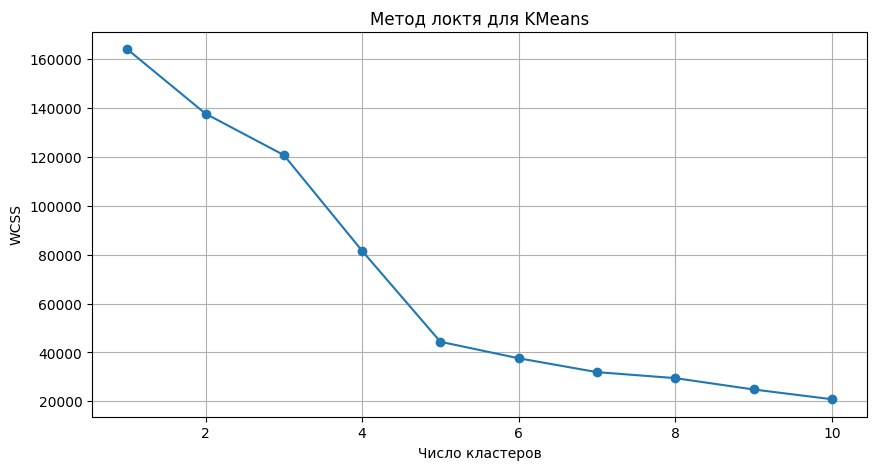

Силуэтный коэффициент для 4 кластеров: 0.424


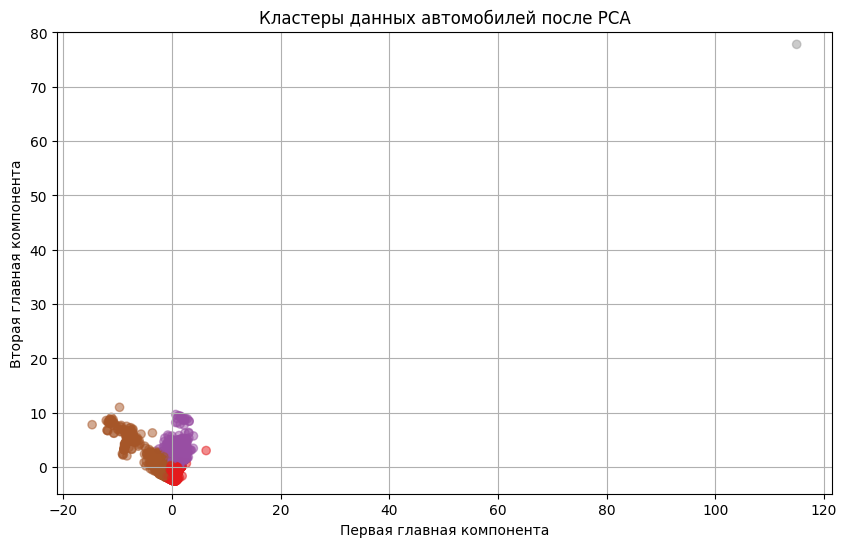

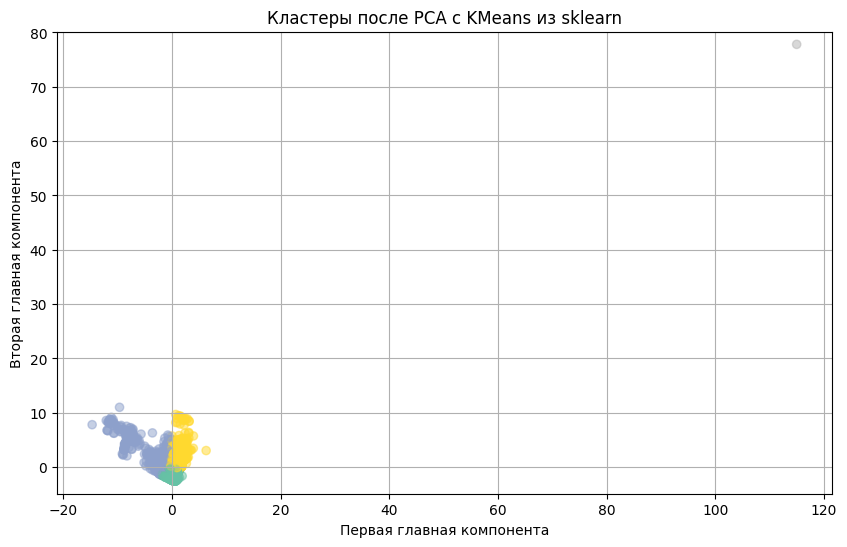

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from google.colab import files

# 1. Загрузка данных
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# 2. Предобработка данных
numerical_data = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# 3. Оптимизация числа кластеров по методу локтя
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя для KMeans')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 4. Определение оптимального числа кластеров
optimal_clusters = 4  # Например, по результатам метода локтя
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# 5. Сравнение с реализацией KMeans из sklearn

silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Силуэтный коэффициент для {optimal_clusters} кластеров: {silhouette_avg:.3f}")

# 6. Визуализация кластеров
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='Set1', alpha=0.5)
plt.title('Кластеры данных автомобилей после PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid(True)
plt.axis('equal')
plt.show()

# 7. Сравнение результатов кластеризации с помощью PCA
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters_pca = kmeans_pca.fit_predict(reduced_data)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters_pca, cmap='Set2', alpha=0.5)
plt.title('Кластеры после PCA с KMeans из sklearn')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid(True)
plt.axis('equal')
plt.show()


# **Контрольные вопросы**

# 1.	Оцените евклидово расстояние между векторами x1 {2, 5, 3 ,7} и x2 {2, 7, 1, 5}.



Ответ:


Евклидово расстояние между векторами
x1 = {2,5,3,7} и x2 = {2,7,1,5} составляет примерно 3.464.

In [1]:
import numpy as np

# Векторы x1 и x2
x1 = np.array([2, 5, 3, 7])
x2 = np.array([2, 7, 1, 5])

# Вычисление евклидова расстояния
euclidean_distance = np.linalg.norm(x1 - x2)
euclidean_distance


3.4641016151377544

# 2.	Оцените расстояние Чебышева между векторами x1 {0, 10, 4, 9} и x2 {3, 7, 0, 2}.



Ответ:

Расстояние Чебышева между векторами

x1 = {0,10,4,9} и
x2 = {3,7,0,2} составляет 7.

In [2]:
import numpy as np

# Векторы
x1 = np.array([0, 10, 4, 9])
x2 = np.array([3, 7, 0, 2])

# Расчет расстояния Чебышева
chebyshev_distance = np.max(np.abs(x1 - x2))
chebyshev_distance


7

# 3.	Есть три центроида c1 {1, 0, 0}, c2 {0, 1, 1}, c3{1, 0, 1} и точка x с координатами {2, 0, 2}. К какому кластеру следует отнести эту точку при использовании евклидовой метрики расстояния?



Ответ:

In [3]:
import numpy as np

# Координаты точек
x = np.array([2, 0, 2])
c1 = np.array([1, 0, 0])
c2 = np.array([0, 1, 1])
c3 = np.array([1, 0, 1])

# Функция для расчета евклидова расстояния
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Расчёт расстояний от x до каждого центроида
dist_c1 = euclidean_distance(x, c1)
dist_c2 = euclidean_distance(x, c2)
dist_c3 = euclidean_distance(x, c3)

# Определение ближайшего центроида
distances = {'c1': dist_c1, 'c2': dist_c2, 'c3': dist_c3}
closest_centroid = min(distances, key=distances.get)

# Вывод результатов
print(f"Расстояние от точки x до c1: {dist_c1}")
print(f"Расстояние от точки x до c2: {dist_c2}")
print(f"Расстояние от точки x до c3: {dist_c3}")
print(f"Точку x стоит отнести к {closest_centroid}, так как это ближайший центроид.")


Расстояние от точки x до c1: 2.23606797749979
Расстояние от точки x до c2: 2.449489742783178
Расстояние от точки x до c3: 1.4142135623730951
Точку x стоит отнести к c3, так как это ближайший центроид.


#  4.Как называется метод определения оптимального числа k (кластеров) с использованием анализа инерции?



Ответ:

Метод, который используется для определения оптимального числа кластеров
k с использованием анализа инерции, называется "метод локтя" (Elbow method).

В этом методе инерция (сумма квадратов расстояний от точек до ближайшего центроида) рассчитывается для различных значений
k. На графике инерции по оси
y и числа кластеров
k по оси
x ищут точку, где инерция начинает уменьшаться медленнее, образуя излом, напоминающий "локоть". Эта точка и указывает на оптимальное количество кластеров.